# IS362_ASSIGNMENT13
## David Vayman

### Import all necessary libraries 



In [56]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Attributes

     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d

### Load in table and Display catagories 

In [65]:
mushrooms = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',
                          sep=',', header=None, 
                          usecols=[0,2,3,5], names=["Edibility","Cap-Surface","Color","Odor"])
mushrooms.head(21)

,Edibility,Cap-Surface,Color,Odor
0,p,s,n,p
1,e,s,y,a
2,e,s,w,l
3,p,y,w,p
4,e,s,g,n
5,e,y,y,a
6,e,s,w,a
7,e,y,w,l
8,p,y,w,p
9,e,s,y,a


### Edibility : P ( Poisonous)= 1 , E(edible)=0


In [66]:
mushrooms.replace(to_replace={"Edibility":{'p': 1, 'e': 0}}, inplace=True)
mushrooms.replace(to_replace={"Odor":{'a':0, 'l':1, 'c':2, 'y':3, 'f':4, 'm':5, 'n':6, 'p':7, 's':8}}, inplace=True)
mushrooms.replace(to_replace={"Cap-Surface":{'f':1,'g':2,'y':3,'s':4}}, inplace=True)
mushrooms.replace(to_replace={"Color":{'n':0,'b':1,'c':2,'g':3,'r':4,'p':5,'u':6,'e':7,'w':8,'y':9}}, inplace=True)

mushrooms

,Edibility,Cap-Surface,Color,Odor
0,1,4,0,7
1,0,4,9,0
2,0,4,8,1
3,1,3,8,7
4,0,4,3,6
5,0,3,9,0
6,0,4,8,0
7,0,3,8,1
8,1,3,8,7
9,0,4,9,0


## Examine Data 

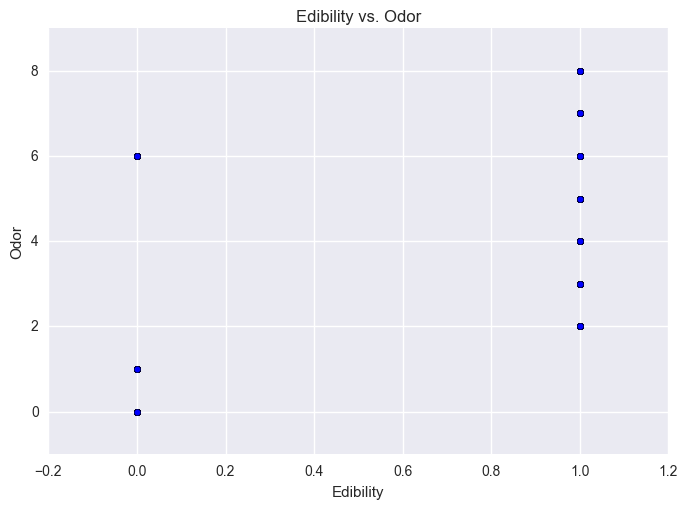

In [68]:
x = mushrooms['Edibility'].values
y = mushrooms['Odor'].values

plt.title("Edibility vs. Odor")
plt.xlabel("Edibility")
plt.ylabel("Odor")
plt.scatter(x,y)
plt.show()

### Edibility : P ( Poisonous)= 1 , E(edible)=0, 
### ODORS: almond= 0,anise=1,creosote=2,fishy=3,foul=4,musty=5,none=6,pungent=7,spicy=8
 
 
As we look at the scatterplot and do some analysis we can see that out of the edible mushrooms or 0 we have odors like almond, anise, or none. On the other hand the Poisonous mushrooms have odors like creosote, fishy, foul,pungent,spicy, or none. Based of this data we can say that All mushrooms that have pleasent aromas such as almonds or anise are always edible and that mushrooms with no smell at all should be examined in a different fashion. 
 

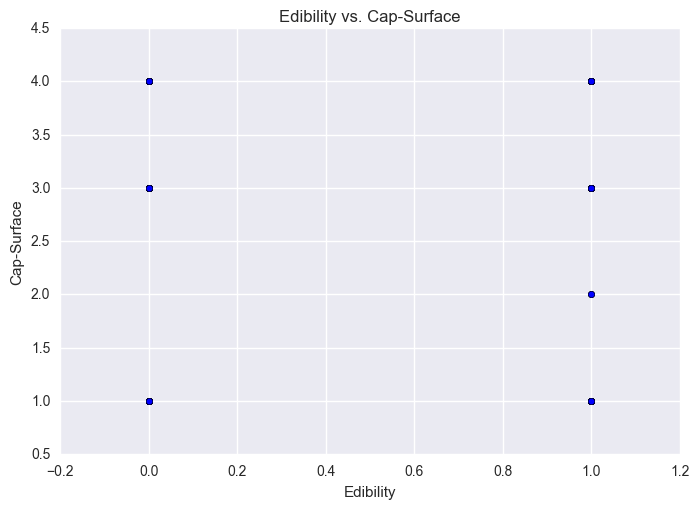

In [69]:
x = mushrooms['Edibility'].values
y = mushrooms['Cap-Surface'].values

plt.title("Edibility vs. Cap-Surface")
plt.xlabel("Edibility")
plt.ylabel("Cap-Surface")
plt.scatter(x,y)
plt.show()

## fibrous=1,grooves=2,scaly=3,smooth=4
### Edibility : P ( Poisonous)= 1 , E(edible)=0, 

By examining this Data we can clearly see that all mushrooms with grooves on its cap surface are poisonous and should be avoided. We should not determine Edibility by cap- surface because poisonous mushrooms have all types of different cap surfaces.


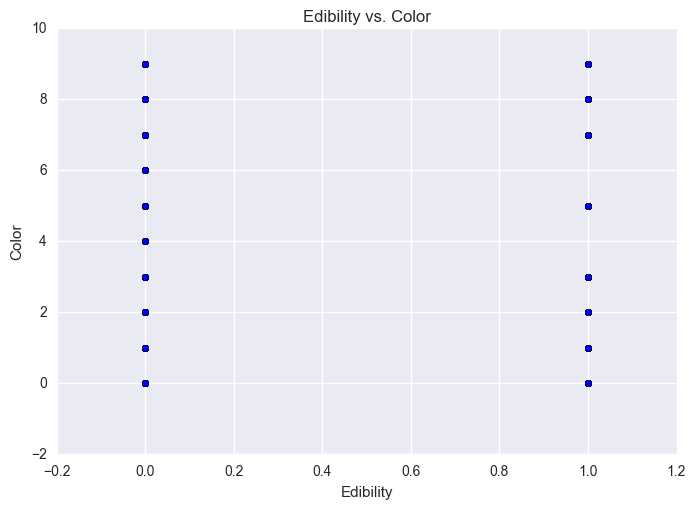

In [72]:
x = mushrooms['Edibility'].values
y = mushrooms['Color'].values

plt.title("Edibility vs. Color")
plt.xlabel("Edibility")
plt.ylabel("Color")
plt.scatter(x,y)
plt.show()

## cap-color:     brown=0,buff=1,cinnamon=2,gray=3,green=4, pink=5,purple=6,red=7,white=8,yellow=9

Using this data we can determine that Green and Purple mushroom are not poisonous 